In [175]:
# Import basic libraries 
import os
import pandas as pd 
import numpy as np
import seaborn as sns
from string import ascii_uppercase
from pandas import DataFrame
import matplotlib.pyplot as plt        
%matplotlib inline

#import classification modules
from sklearn.neural_network import MLPClassifier
# Selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [176]:
import warnings
warnings.filterwarnings("ignore")

In [177]:
# Load Dataset
missing=["na","--",".",".."]
mydata= pd.read_csv("hepatitis.csv", na_values=missing)
mydata

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,1,46,1,2,2,1,1,1,2,1,2,1,1,1,7.6,105,242,3.3,50,2
138,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,61,2
139,2,61,1,1,2,1,1,2,1,2,2,1,2,2,0.8,75,20,4.1,61,2
140,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


In [178]:
mydata.isnull().sum() # Checking for Value

class             0
age               0
sex               0
steroid           0
antivirals        0
fatigue           0
malaise           0
anorexia          0
liver_big         0
liver_firm        0
spleen_palable    0
spiders           0
ascites           0
varices           0
bilirubin         0
alk_phosphate     0
sgot              0
albumin           0
protime           0
histology         0
dtype: int64

In [179]:
mydata.dtypes

class               int64
age                 int64
sex                 int64
steroid             int64
antivirals          int64
fatigue             int64
malaise             int64
anorexia            int64
liver_big           int64
liver_firm          int64
spleen_palable      int64
spiders             int64
ascites             int64
varices             int64
bilirubin         float64
alk_phosphate       int64
sgot                int64
albumin           float64
protime             int64
histology           int64
dtype: object

In [180]:
mydata["class"].replace((1,2),(0,1),inplace=True)

In [181]:
mydata["class"]=mydata["class"].astype("bool")

In [182]:
mydata.dtypes

class                bool
age                 int64
sex                 int64
steroid             int64
antivirals          int64
fatigue             int64
malaise             int64
anorexia            int64
liver_big           int64
liver_firm          int64
spleen_palable      int64
spiders             int64
ascites             int64
varices             int64
bilirubin         float64
alk_phosphate       int64
sgot                int64
albumin           float64
protime             int64
histology           int64
dtype: object

In [183]:
mydata

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,True,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,True,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,True,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,True,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,True,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,False,46,1,2,2,1,1,1,2,1,2,1,1,1,7.6,105,242,3.3,50,2
138,True,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,61,2
139,True,61,1,1,2,1,1,2,1,2,2,1,2,2,0.8,75,20,4.1,61,2
140,True,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


In [184]:
# pemisahan data pada kolom Age dengan ketentuan tertentu
mydata["age"]=np.where((mydata["age"]>10) & (mydata["age"]<20),"Teenagers",
                   np.where((mydata["age"]>=20) & (mydata["age"]<=30),"Adults",
                   np.where((mydata["age"]>30) & (mydata["age"]<=40),"Middle Aged",np.where((mydata["age"]<=10),"Children",
                            "Old"))))

In [185]:
#merubah tipe data age menjadi kategori dan membuat kategori data baru
mydata["age"]=pd.Categorical(mydata.age,["Children",'Teenagers','Adults', 'Middle Aged', 'Old'],ordered=True)

In [186]:
mydata.dtypes

class                 bool
age               category
sex                  int64
steroid              int64
antivirals           int64
fatigue              int64
malaise              int64
anorexia             int64
liver_big            int64
liver_firm           int64
spleen_palable       int64
spiders              int64
ascites              int64
varices              int64
bilirubin          float64
alk_phosphate        int64
sgot                 int64
albumin            float64
protime              int64
histology            int64
dtype: object

In [187]:
#value tiap kategori data baru
mydata["age"].value_counts() 

Old            65
Middle Aged    46
Adults         30
Children        1
Teenagers       0
Name: age, dtype: int64

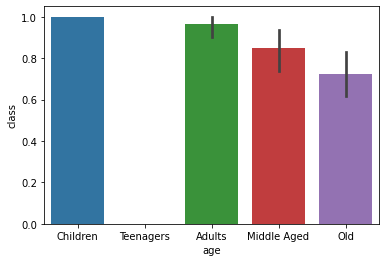

In [188]:
#grafik perbandingan data kategori baru dari kolom Age dengan survival
sns.barplot(x="age", y="class", data=mydata)
plt.show()

In [189]:
mydata["sex"].replace((1,2),("Male","Female"),inplace=True)
mydata["sex"]=pd.Categorical(mydata.sex,["Male",'Female'],ordered=False)
mydata

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,True,Adults,Female,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,True,Old,Male,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,True,Old,Male,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,True,Middle Aged,Male,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,True,Middle Aged,Male,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,False,Old,Male,2,2,1,1,1,2,1,2,1,1,1,7.6,105,242,3.3,50,2
138,True,Old,Male,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,61,2
139,True,Old,Male,1,2,1,1,2,1,2,2,1,2,2,0.8,75,20,4.1,61,2
140,True,Old,Female,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


In [190]:
mydata.dtypes

class                 bool
age               category
sex               category
steroid              int64
antivirals           int64
fatigue              int64
malaise              int64
anorexia             int64
liver_big            int64
liver_firm           int64
spleen_palable       int64
spiders              int64
ascites              int64
varices              int64
bilirubin          float64
alk_phosphate        int64
sgot                 int64
albumin            float64
protime              int64
histology            int64
dtype: object

In [191]:
mydata.dropna(inplace=True) # Now dropping all nulls

In [192]:
mydata.isnull().sum()

class             0
age               0
sex               0
steroid           0
antivirals        0
fatigue           0
malaise           0
anorexia          0
liver_big         0
liver_firm        0
spleen_palable    0
spiders           0
ascites           0
varices           0
bilirubin         0
alk_phosphate     0
sgot              0
albumin           0
protime           0
histology         0
dtype: int64

In [193]:
mydata.dtypes

class                 bool
age               category
sex               category
steroid              int64
antivirals           int64
fatigue              int64
malaise              int64
anorexia             int64
liver_big            int64
liver_firm           int64
spleen_palable       int64
spiders              int64
ascites              int64
varices              int64
bilirubin          float64
alk_phosphate        int64
sgot                 int64
albumin            float64
protime              int64
histology            int64
dtype: object

In [194]:
#Kami memiliki variabel kategori. get_dummies memisahkan kategori yang berbeda dari variabel kategori sebagai terpisah
mydata = pd.get_dummies(mydata,drop_first=True)
print(mydata.columns)
mydata.head()

Index(['class', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'age_Teenagers', 'age_Adults', 'age_Middle Aged',
       'age_Old', 'sex_Female'],
      dtype='object')


,class,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,...,alk_phosphate,sgot,albumin,protime,histology,age_Teenagers,age_Adults,age_Middle Aged,age_Old,sex_Female
0,True,1,2,2,2,2,1,2,2,2,...,85,18,4.0,61,1,0,1,0,0,1
1,True,1,2,1,2,2,1,2,2,2,...,135,42,3.5,61,1,0,0,0,1,0
2,True,2,2,1,2,2,2,2,2,2,...,96,32,4.0,61,1,0,0,0,1,0
3,True,2,2,2,2,2,2,2,2,2,...,105,200,4.0,61,1,0,0,1,0,0
4,True,2,2,2,2,2,2,2,2,2,...,95,28,4.0,75,1,0,0,1,0,0


In [195]:
mydata["bilirubin"]=np.abs((mydata["bilirubin"]-mydata["bilirubin"].mean())/(mydata["bilirubin"].std()))
mydata["albumin"]=np.abs((mydata["albumin"]-mydata["albumin"].mean())/(mydata["albumin"].std()))

In [196]:
mydata

,class,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,...,alk_phosphate,sgot,albumin,protime,histology,age_Teenagers,age_Adults,age_Middle Aged,age_Old,sex_Female
0,True,1,2,2,2,2,1,2,2,2,...,85,18,0.274237,61,1,0,1,0,0,1
1,True,1,2,1,2,2,1,2,2,2,...,135,42,0.534689,61,1,0,0,0,1,0
2,True,2,2,1,2,2,2,2,2,2,...,96,32,0.274237,61,1,0,0,0,1,0
3,True,2,2,2,2,2,2,2,2,2,...,105,200,0.274237,61,1,0,0,1,0,0
4,True,2,2,2,2,2,2,2,2,2,...,95,28,0.274237,75,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,False,2,2,1,1,1,2,1,2,1,...,105,242,0.858260,50,2,0,0,0,1,0
138,True,2,2,1,2,2,2,1,2,2,...,126,142,0.759593,61,2,0,0,0,1,0
139,True,1,2,1,1,2,1,2,2,1,...,75,20,0.436023,61,2,0,0,0,1,0
140,True,1,2,1,2,2,2,2,1,1,...,81,19,0.436023,48,2,0,0,0,1,1


In [197]:
y=mydata["class"].copy()
X=mydata.drop(columns=["class"])
print(y.shape)
print(X.shape)

(142,)
(142, 22)


In [198]:
mydata

,class,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,...,alk_phosphate,sgot,albumin,protime,histology,age_Teenagers,age_Adults,age_Middle Aged,age_Old,sex_Female
0,True,1,2,2,2,2,1,2,2,2,...,85,18,0.274237,61,1,0,1,0,0,1
1,True,1,2,1,2,2,1,2,2,2,...,135,42,0.534689,61,1,0,0,0,1,0
2,True,2,2,1,2,2,2,2,2,2,...,96,32,0.274237,61,1,0,0,0,1,0
3,True,2,2,2,2,2,2,2,2,2,...,105,200,0.274237,61,1,0,0,1,0,0
4,True,2,2,2,2,2,2,2,2,2,...,95,28,0.274237,75,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,False,2,2,1,1,1,2,1,2,1,...,105,242,0.858260,50,2,0,0,0,1,0
138,True,2,2,1,2,2,2,1,2,2,...,126,142,0.759593,61,2,0,0,0,1,0
139,True,1,2,1,1,2,1,2,2,1,...,75,20,0.436023,61,2,0,0,0,1,0
140,True,1,2,1,2,2,2,2,1,1,...,81,19,0.436023,48,2,0,0,0,1,1


In [199]:
trainX, testX, trainy, testy= train_test_split(X,y, test_size=0.2, random_state=1)
# print("\n shape of train split: ")
print(trainX.shape)
# print("\n shape of train split: ")
print(testX.shape)

(113, 22)
(29, 22)


In [209]:
nn=MLPClassifier(hidden_layer_sizes=20,batch_size=10,max_iter=100, random_state=1)
nn.fit(trainX,trainy)
predictions = nn.predict(testX)
accnn=accuracy_score(testy, predictions)*100
print("Accuracy of Neural Networks (%): \n",accnn)  
recallnn=recall_score(testy,predictions)*100
print("Recall of Neural Networks is: \n",recallnn)
precnn=precision_score(testy,predictions)*100
print("Precision of Neural Networks is: \n",precnn)

Accuracy of Neural Networks (%): 
 86.20689655172413
Recall of Neural Networks is: 
 95.83333333333334
Precision of Neural Networks is: 
 88.46153846153845


In [210]:
nn=MLPClassifier(hidden_layer_sizes=20,batch_size=10,max_iter=100, random_state=1)

In [211]:
scores = cross_val_score(nn, X, y, cv=5, scoring='accuracy')

In [212]:
print(scores)

[0.82758621 0.75862069 0.82142857 0.85714286 0.85714286]


In [213]:
print(scores.mean())

0.8243842364532019


In [214]:
k_range = range(1,100)
k_scores = []

for k in k_range:
    nn=MLPClassifier(hidden_layer_sizes=20,batch_size=10,max_iter=k, random_state=1)
    scores = cross_val_score(nn, X, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

In [215]:
k_scores

[0.5490147783251232,
 0.6830049261083744,
 0.6270935960591133,
 0.619704433497537,
 0.6751231527093597,
 0.7470443349753694,
 0.732512315270936,
 0.7399014778325123,
 0.7263546798029556,
 0.7748768472906404,
 0.767487684729064,
 0.7889162561576354,
 0.7820197044334976,
 0.8098522167487685,
 0.7886699507389162,
 0.7889162561576354,
 0.8032019704433498,
 0.8169950738916256,
 0.7746305418719212,
 0.795566502463054,
 0.795566502463054,
 0.795566502463054,
 0.8098522167487683,
 0.7815270935960591,
 0.7953201970443349,
 0.8027093596059112,
 0.8024630541871922,
 0.8096059113300493,
 0.7953201970443349,
 0.8027093596059112,
 0.7886699507389162,
 0.8167487684729065,
 0.8027093596059112,
 0.8027093596059112,
 0.8027093596059112,
 0.8100985221674877,
 0.8096059113300493,
 0.7746305418719213,
 0.8241379310344827,
 0.7881773399014779,
 0.8241379310344827,
 0.7677339901477833,
 0.8241379310344827,
 0.7815270935960591,
 0.8169950738916256,
 0.8238916256157636,
 0.8241379310344825,
 0.8167487684729065

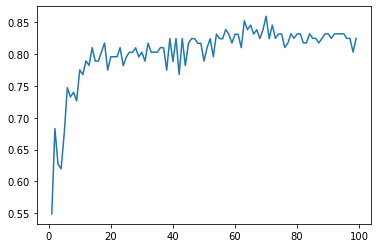

In [216]:
sns.lineplot(x = k_range, y = k_scores);